In [ ]:
"""
=========================================================
DUMMY SCRIPT TO PASS FROM BAYESPRISM OUTPUT TO ANNDATA
=========================================================
"""

In [3]:
#=================
# Import Libraries
#=================
import os
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import anndata as ad
import scanpy as sc

import pdb

In [4]:
# ================
# Load AnnData with bulkRNA and Metadata
print(f'Read bulkRNA AnnData')
ifile = 'C:/Users/moren/PycharmProjects/TFM/R/Anndata_BP/Anndata_AD_BP.h5ad'
opath = r'C:\Users\moren\PycharmProjects\TFM\ELA_DFT_Analysis\plots'
anndat = ad.read(ifile)
print(anndat)


Read bulkRNA AnnData
AnnData object with n_obs × n_vars = 52 × 55765
    obs: 'specimenID', 'SYNID', 'Batch', 'organ', 'tissue', 'nucleicAcidSource', 'assay', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'Dx', 'Ast', 'End', 'Ex', 'In', 'Mic', 'Oli', 'Opc', 'Per', 'ID'


In [5]:
anndat.obs

,specimenID,SYNID,Batch,organ,tissue,nucleicAcidSource,assay,projid,Study,msex,...,Dx,Ast,End,Ex,In,Mic,Oli,Opc,Per,ID
08_120410,08_120410,syn4212542,1,brain,dorsolateral prefrontal cortex,bulk cell,rnaSeq,11697592,ROS,1,...,HC,0.300203,0.111218,0.425002,0.000050,0.013677,0.144809,3.561114e-04,0.004685,08_120410
116_120418,116_120418,syn4212554,1,brain,dorsolateral prefrontal cortex,bulk cell,rnaSeq,50102240,MAP,1,...,HC,0.248819,0.082396,0.583895,0.011003,0.009444,0.059430,1.034335e-04,0.004909,116_120418
122_120418,122_120418,syn4212560,1,brain,dorsolateral prefrontal cortex,bulk cell,rnaSeq,21407511,ROS,0,...,HC,0.217589,0.103478,0.567805,0.011884,0.007635,0.083203,3.635801e-05,0.008371,122_120418
134_120419,134_120419,syn4212571,1,brain,dorsolateral prefrontal cortex,bulk cell,rnaSeq,20500815,ROS,0,...,AD,0.156071,0.196156,0.555059,0.001064,0.049336,0.042164,9.472408e-07,0.000149,134_120419
142_120419,142_120419,syn4212576,1,brain,dorsolateral prefrontal cortex,bulk cell,rnaSeq,15712086,ROS,1,...,HC,0.183796,0.059430,0.708398,0.002174,0.004554,0.034100,3.094647e-03,0.004454,142_120419
154_120423,154_120423,syn4212585,1,brain,dorsolateral prefrontal cortex,bulk cell,rnaSeq,20506587,ROS,0,...,AD,0.253895,0.079775,0.577551,0.019998,0.009821,0.050816,1.757042e-04,0.007968,154_120423
171_120423,171_120423,syn4212597,1,brain,dorsolateral prefrontal cortex,bulk cell,rnaSeq,11606935,ROS,1,...,AD,0.120217,0.055802,0.691810,0.024855,0.002373,0.101187,6.537588e-07,0.003756,171_120423
173_120424,173_120424,syn4212598,1,brain,dorsolateral prefrontal cortex,bulk cell,rnaSeq,50302428,MAP,0,...,AD,0.212920,0.097144,0.585046,0.003901,0.025608,0.069512,6.327984e-05,0.005806,173_120424
19_120411,19_120411,syn4212616,1,brain,dorsolateral prefrontal cortex,bulk cell,rnaSeq,15176592,ROS,1,...,HC,0.195722,0.098917,0.612942,0.000644,0.017212,0.067743,4.586254e-04,0.006361,19_120411
21_120411,21_120411,syn4212633,1,brain,dorsolateral prefrontal cortex,bulk cell,rnaSeq,50107583,MAP,1,...,HC,0.146019,0.167110,0.606190,0.004308,0.024351,0.051681,1.147485e-06,0.000339,21_120411


In [6]:
# ================
# Include cell-type-especific gene expression
#
#  Each cell type will be included as a layer

ipath = 'C:/Users/moren/PycharmProjects/TFM/R/results_BP/'
typelist = ['Ast','Ex','In',
            'End','Mic','Oli',
           'Opc','Per']

# Loop over all celltypes
for ctype in typelist:
    print(f'Working with type: {ctype}')
    ifile = join(ipath,ctype+'.csv')
    
    # Read celltype gene exp
    cellexp = pd.read_csv(ifile, index_col=0)    
    
    # Init new layer
    anndat.layers[ctype] = np.zeros_like(anndat.X)
    
    # Position intersection of genes between anndat and current celltype
    xy,xpos,ypos = np.intersect1d(anndat.var_names, cellexp.columns.values, return_indices=True)
    
    # Iterate over all subjects and put into layer
    for csubj in cellexp.index:
        # Subset current subject
        csubjdf = cellexp.loc[csubj,:]
        # Parse gene expression to correct position
        anndat.layers[ctype][anndat.obs_names == csubj , xpos] = csubjdf[ypos].values
        
        

Working with type: Ast
Working with type: Ex
Working with type: In
Working with type: End
Working with type: Mic
Working with type: Oli
Working with type: Opc
Working with type: Per


Plot Ex neurons gene expression between two groups
Plot AST neurons gene expression between two groups
Plot Mic neurons gene expression between two groups
Plot Inh neurons gene expression between two groups


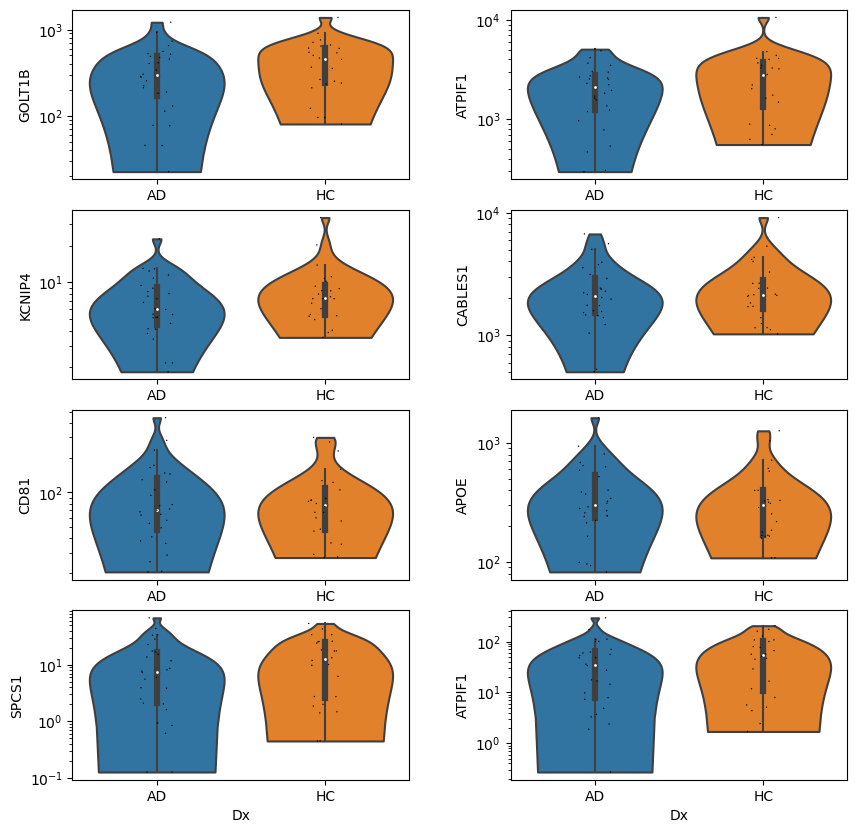

In [16]:
# ======================
# Export updated AnnData
# ======================
# Perform plot of certain genes

# Create a 7x2 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.18)

print(f'Plot Ex neurons gene expression between two groups')
sc.pl.violin(anndat, keys=['GOLT1B'], groupby='Dx', layer="Ex", inner='box', log=True, ax=axs[0,0], show=False)
sc.pl.violin(anndat, keys=["ATPIF1"], groupby='Dx', layer="Ex", inner='box', log=True, ax=axs[0,1], show=False)

print(f'Plot AST neurons gene expression between two groups')
sc.pl.violin(anndat, keys=['KCNIP4'], groupby='Dx', layer="Ast", inner='box', log=True, ax=axs[1,0], show=False)
sc.pl.violin(anndat, keys=["CABLES1"], groupby='Dx', layer="Ast", inner='box', log=True, ax=axs[1,1], show=False)

print(f'Plot Mic neurons gene expression between two groups')
sc.pl.violin(anndat, keys=['CD81'], groupby='Dx', layer="Mic", inner='box', log=True, ax=axs[2,0], show=False)
sc.pl.violin(anndat, keys=["APOE"], groupby='Dx', layer="Mic", inner='box', log=True, ax=axs[2,1], show=False)

print(f'Plot Inh neurons gene expression between two groups')
sc.pl.violin(anndat, keys=['SPCS1'], groupby='Dx', layer="In", inner='box', log=True, ax=axs[3,0], show=False)
sc.pl.violin(anndat, keys=["ATPIF1"], groupby='Dx', layer="In", inner='box', log=True, ax=axs[3,1], show=False)

#Save the plot
plt.savefig(r'C:\Users\moren\PycharmProjects\TFM\ELA_DFT_Analysis\plots\all_plots_AD.png')

# Show the plot
plt.show()

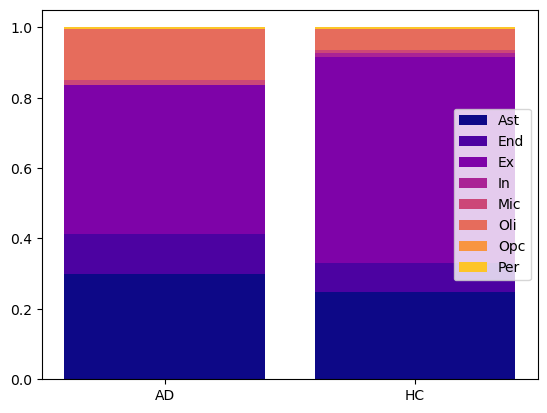

In [11]:
# Subjects cell fractions health condition
#=========================================

# Calculate means by grour of disease
df = anndat.obs[['specimenID', 'Dx', 'Ast','End', 'Ex', 'In', 'Mic', 'Oli', 'Opc', 'Per']]
df_cell_fraction = df.groupby('Dx').mean()

# Extract the ID and variable columns
ids = df_cell_fraction.index
vars = df.drop(['specimenID', 'Dx'], axis=1)

# Create the plot
fig, ax = plt.subplots()

# Create the bars for each subject
for i, id in enumerate(ids):
    bottom = 0
    for j, var in enumerate(vars.columns):
        ax.bar(id, vars.iloc[i][j], bottom=bottom, color=plt.cm.plasma(j/len(vars.columns)))
        bottom += vars.iloc[i][j]
            
# Add a legend
ax.legend(vars.columns, loc=0)

#x-labels rotation
#ax.tick_params(axis='x', rotation=80)

#Save the plot
plt.savefig(opath + 'AD_stackedbarplot.png', dpi = 300)

# Show the plot
plt.show()
